<a href="https://colab.research.google.com/github/swamy-surla/Data-mining-1/blob/main/Swamy_DM1_Programing_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [8]:
file_ = open("/content/drive/MyDrive/data_mining/Grocery_Items_60.csv")

In [9]:
data_string = file_.read()

In [10]:
data = []
for line in data_string.split("\n")[1:-1]:
  temp = line.split(",")
  temp = list(filter(lambda x: x != '', temp))
  data.append(temp)


# 1 (c)

In [11]:
def extract_association_rules(data,min_support,min_confidence_threshold):
  te = TransactionEncoder()
  te_ary = te.fit(data).transform(data)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)
  return rules


In [12]:
rules_dataset = extract_association_rules(data,0.01,0.1)

In [13]:
rules_dataset

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.084000,0.163375,0.012000,0.142857,0.874413,-0.001723,0.976062,-0.135543
1,(other vegetables),(whole milk),0.121500,0.163375,0.016000,0.131687,0.806043,-0.003850,0.963507,-0.215014
2,(rolls/buns),(whole milk),0.113250,0.163375,0.014625,0.129139,0.790446,-0.003877,0.960687,-0.230157
3,(soda),(whole milk),0.097625,0.163375,0.014125,0.144686,0.885609,-0.001824,0.978150,-0.125217


# 1 (d)

In [14]:
minimum_support = [0.001, 0.005, 0.01]
minimum_confidence = [0.05, 0.075, 0.1]
heat_map = []
for min_confidence in minimum_confidence:
  temp = []
  for min_support in minimum_support:
    rules = extract_association_rules(data,min_support,min_confidence)
    temp.append(len(rules))
  heat_map.append(temp)

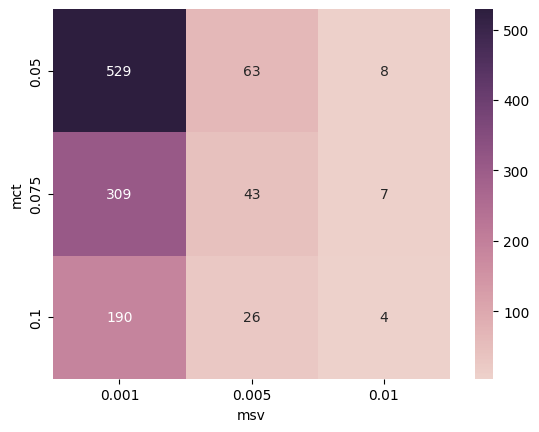

In [15]:
sns.heatmap(heat_map, annot=True,fmt='d',cmap=sns.cubehelix_palette(as_cmap=True))
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=minimum_support)  # X-axis ticks
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=minimum_confidence)  # Y-axis ticks
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()

# 1 (e)

In [16]:
midpoint = len(data) // 2

part1 = data[:midpoint]
part2 = data[midpoint:]

In [17]:
rules_datasplit_1 = extract_association_rules(part1,min_support=0.005,min_confidence_threshold=0.075)
rules_datasplit_2 =extract_association_rules(part2,min_support=0.005,min_confidence_threshold=0.075)


In [18]:
rules_datasplit_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.08400,0.16200,0.01225,0.145833,0.900206,-0.001358,0.981073,-0.107958
1,(whole milk),(yogurt),0.16200,0.08400,0.01225,0.075617,0.900206,-0.001358,0.990932,-0.116832
2,(yogurt),(rolls/buns),0.08400,0.11525,0.00825,0.098214,0.852185,-0.001431,0.981109,-0.159212
3,(yogurt),(other vegetables),0.08400,0.12075,0.00850,0.101190,0.838016,-0.001643,0.978238,-0.174250
4,(yogurt),(soda),0.08400,0.09950,0.00700,0.083333,0.837521,-0.001358,0.982364,-0.174775
5,(whole milk),(other vegetables),0.16200,0.12075,0.01525,0.094136,0.779593,-0.004311,0.970620,-0.252267
6,(other vegetables),(whole milk),0.12075,0.16200,0.01525,0.126294,0.779593,-0.004311,0.959133,-0.243312
7,(rolls/buns),(other vegetables),0.11525,0.12075,0.00975,0.084599,0.700610,-0.004166,0.960508,-0.325687
8,(other vegetables),(rolls/buns),0.12075,0.11525,0.00975,0.080745,0.700610,-0.004166,0.962465,-0.327058
9,(rolls/buns),(whole milk),0.11525,0.16200,0.01275,0.110629,0.682895,-0.005921,0.942239,-0.344194


In [19]:
rules_datasplit_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.08400,0.16475,0.01175,0.139881,0.849050,-0.002089,0.971087,-0.162543
1,(yogurt),(other vegetables),0.08400,0.12225,0.00800,0.095238,0.779044,-0.002269,0.970145,-0.236428
2,(yogurt),(rolls/buns),0.08400,0.11125,0.00725,0.086310,0.775816,-0.002095,0.972704,-0.239812
3,(root vegetables),(soda),0.07250,0.09575,0.00700,0.096552,1.008373,0.000058,1.000887,0.008953
4,(root vegetables),(other vegetables),0.07250,0.12225,0.00650,0.089655,0.733376,-0.002363,0.964195,-0.281597
5,(root vegetables),(whole milk),0.07250,0.16475,0.00825,0.113793,0.690702,-0.003694,0.942500,-0.325603
6,(root vegetables),(yogurt),0.07250,0.08400,0.00625,0.086207,1.026273,0.000160,1.002415,0.027601
7,(bottled water),(rolls/buns),0.06150,0.11125,0.00625,0.101626,0.913492,-0.000592,0.989287,-0.091657
8,(bottled water),(other vegetables),0.06150,0.12225,0.00550,0.089431,0.731541,-0.002018,0.963958,-0.281106
9,(whole milk),(other vegetables),0.16475,0.12225,0.01675,0.101669,0.831650,-0.003391,0.977090,-0.195079


In [20]:
pd.merge(rules_datasplit_1, rules_datasplit_2, on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(yogurt),(whole milk),0.08400,0.16200,0.01225,0.145833,0.900206,-0.001358,0.981073,-0.107958,0.08400,0.16475,0.01175,0.139881,0.849050,-0.002089,0.971087,-0.162543
1,(yogurt),(rolls/buns),0.08400,0.11525,0.00825,0.098214,0.852185,-0.001431,0.981109,-0.159212,0.08400,0.11125,0.00725,0.086310,0.775816,-0.002095,0.972704,-0.239812
2,(yogurt),(other vegetables),0.08400,0.12075,0.00850,0.101190,0.838016,-0.001643,0.978238,-0.174250,0.08400,0.12225,0.00800,0.095238,0.779044,-0.002269,0.970145,-0.236428
3,(whole milk),(other vegetables),0.16200,0.12075,0.01525,0.094136,0.779593,-0.004311,0.970620,-0.252267,0.16475,0.12225,0.01675,0.101669,0.831650,-0.003391,0.977090,-0.195079
4,(other vegetables),(whole milk),0.12075,0.16200,0.01525,0.126294,0.779593,-0.004311,0.959133,-0.243312,0.12225,0.16475,0.01675,0.137014,0.831650,-0.003391,0.967861,-0.187403
5,(rolls/buns),(other vegetables),0.11525,0.12075,0.00975,0.084599,0.700610,-0.004166,0.960508,-0.325687,0.11125,0.12225,0.01000,0.089888,0.735277,-0.003600,0.964441,-0.288306
6,(other vegetables),(rolls/buns),0.12075,0.11525,0.00975,0.080745,0.700610,-0.004166,0.962465,-0.327058,0.12225,0.11125,0.01000,0.081800,0.735277,-0.003600,0.967926,-0.290868
7,(rolls/buns),(whole milk),0.11525,0.16200,0.01275,0.110629,0.682895,-0.005921,0.942239,-0.344194,0.11125,0.16475,0.01650,0.148315,0.900240,-0.001828,0.980703,-0.110863
8,(whole milk),(rolls/buns),0.16200,0.11525,0.01275,0.078704,0.682895,-0.005921,0.960332,-0.356549,0.16475,0.11125,0.01650,0.100152,0.900240,-0.001828,0.987667,-0.117132
9,(tropical fruit),(other vegetables),0.05925,0.12075,0.00525,0.088608,0.733810,-0.001904,0.964733,-0.278289,0.07550,0.12225,0.00600,0.079470,0.650063,-0.003230,0.953527,-0.367998


# Create Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])



In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Read Image Data

In [25]:
path = "/content/drive/MyDrive/data_mining/Processed_images"

In [26]:
batch_size = 8
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=0

)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=0
)

Found 696 files belonging to 4 classes.
Using 557 files for training.
Found 696 files belonging to 4 classes.
Using 139 files for validation.


# Train Model

In [27]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
70/70 [==============================] - 88s 1s/step - loss: 367.3026 - accuracy: 0.2442 - val_loss: 1.3866 - val_accuracy: 0.2590
Epoch 2/20
70/70 [==============================] - 17s 233ms/step - loss: 1.3823 - accuracy: 0.3106 - val_loss: 1.3873 - val_accuracy: 0.2158
Epoch 3/20
70/70 [==============================] - 17s 230ms/step - loss: 1.3803 - accuracy: 0.3196 - val_loss: 1.3881 - val_accuracy: 0.2158
Epoch 4/20
70/70 [==============================] - 15s 218ms/step - loss: 1.3795 - accuracy: 0.3178 - val_loss: 1.3893 - val_accuracy: 0.2158
Epoch 5/20
70/70 [==============================] - 16s 230ms/step - loss: 1.3769 - accuracy: 0.3196 - val_loss: 1.3905 - val_accuracy: 0.2158
Epoch 6/20
70/70 [==============================] - 16s 229ms/step - loss: 1.3753 - accuracy: 0.3196 - val_loss: 1.3917 - val_accuracy: 0.2158
Epoch 7/20
70/70 [==============================] - 17s 234ms/step - loss: 1.3742 - accuracy: 0.3196 - val_loss: 1.3930 - val_accuracy: 0.2158


# 2(a)

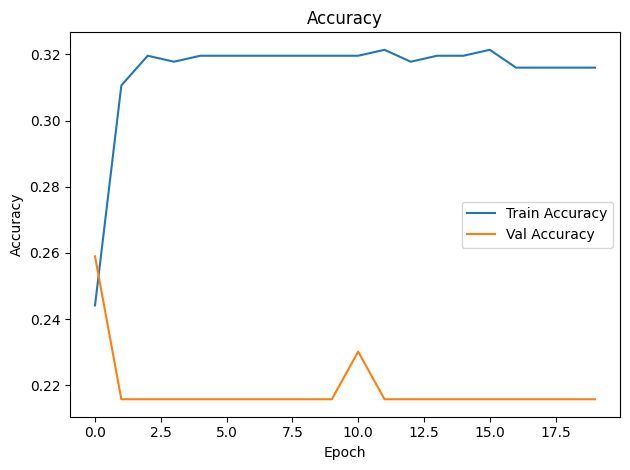

In [28]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(training_accuracy, label='Train Accuracy')
plt.plot(validation_accuracy, label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2 (b)

**Creating model with CNN filters to 4 and 16**

In [29]:
updated_model_1 = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

updated_model_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])




In [30]:
updated_model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
updated_model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [31]:
updated_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 4)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64516)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                1032272   
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1032452 (3.94 MB)
Trainable params: 1032452 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [32]:
updated_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 258064)            0         
                                                                 
 dense_4 (Dense)             (None, 16)                4129040   
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4129556 (15.75 MB)
Trainable params: 4129556 (15.75 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [33]:
history_datasplit_1 = updated_model_1.fit(train_dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
70/70 [==============================] - 16s 207ms/step - loss: 67.7990 - accuracy: 0.2693 - val_loss: 1.3869 - val_accuracy: 0.2158
Epoch 2/20
70/70 [==============================] - 16s 221ms/step - loss: 1.3841 - accuracy: 0.3160 - val_loss: 1.3880 - val_accuracy: 0.2158
Epoch 3/20
70/70 [==============================] - 15s 215ms/step - loss: 1.3820 - accuracy: 0.3160 - val_loss: 1.3893 - val_accuracy: 0.2158
Epoch 4/20
70/70 [==============================] - 16s 220ms/step - loss: 1.3802 - accuracy: 0.3160 - val_loss: 1.3905 - val_accuracy: 0.2158
Epoch 5/20
70/70 [==============================] - 17s 238ms/step - loss: 1.3788 - accuracy: 0.3160 - val_loss: 1.3920 - val_accuracy: 0.2158
Epoch 6/20
70/70 [==============================] - 16s 220ms/step - loss: 1.3776 - accuracy: 0.3160 - val_loss: 1.3934 - val_accuracy: 0.2158
Epoch 7/20
70/70 [==============================] - 15s 215ms/step - loss: 1.3765 - accuracy: 0.3160 - val_loss: 1.3948 - val_accuracy: 0.215

In [34]:
history_datasplit_2 = updated_model_2.fit(train_dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
70/70 [==============================] - 20s 271ms/step - loss: 1004.5412 - accuracy: 0.2406 - val_loss: 1.3859 - val_accuracy: 0.2734
Epoch 2/20
70/70 [==============================] - 20s 281ms/step - loss: 1.3855 - accuracy: 0.2549 - val_loss: 1.3867 - val_accuracy: 0.2734
Epoch 3/20
70/70 [==============================] - 20s 273ms/step - loss: 1.3837 - accuracy: 0.3034 - val_loss: 1.3876 - val_accuracy: 0.2158
Epoch 4/20
70/70 [==============================] - 20s 287ms/step - loss: 1.3820 - accuracy: 0.3160 - val_loss: 1.3889 - val_accuracy: 0.2158
Epoch 5/20
70/70 [==============================] - 22s 308ms/step - loss: 1.3805 - accuracy: 0.3160 - val_loss: 1.3899 - val_accuracy: 0.2158
Epoch 6/20
70/70 [==============================] - 20s 285ms/step - loss: 1.3791 - accuracy: 0.3160 - val_loss: 1.3911 - val_accuracy: 0.2158
Epoch 7/20
70/70 [==============================] - 20s 290ms/step - loss: 1.3781 - accuracy: 0.3160 - val_loss: 1.3927 - val_accuracy: 0.2

# 2 (c)

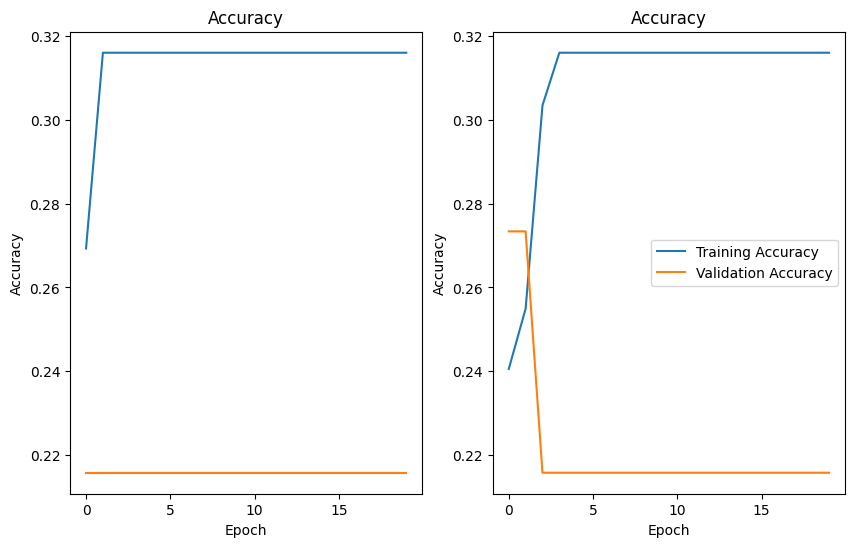

In [35]:

training_accuracy1 = history_datasplit_1.history['accuracy']
validation_accuracy1 = history_datasplit_1.history['val_accuracy']

training_accuracy2 = history_datasplit_2.history['accuracy']
validation_accuracy2 = history_datasplit_2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(10,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


# 2 (d)

1. First Model is underfitting as both accuracies are low and remained flat after intial epochs
2. The experiment model with filter numbers 4 is underfitting as both accuracies are low
3. The experiment model with filter numbers 16 is underfitting as both train and test accuracies are low